
# Practical introduction to Machine Learning
## Practical Session 1 | Unsupervised learning
### Tom REPPELIN

#### Import:

In [1]:
import numpy as np
import pylab as pl
import scipy as sp
import sklearn
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# 1 Datasets:

In [2]:
digits = np.load("digits.npz")

In [3]:
temper = np.load("temper.npz")

In [4]:
data = temper['data']
villes = temper['villes'] 
varname = temper['varname']


In [5]:
data #15 french cities *14 matrix : 12 first columns month, lat and longitude after

array([[ 5.6 ,  6.6 , 10.3 , 12.8 , 15.8 , 19.3 , 20.9 , 21.  , 18.6 ,
        13.8 ,  9.1 ,  6.2 , 44.5 , -0.34],
       [ 6.1 ,  5.8 ,  7.8 ,  9.2 , 11.6 , 14.4 , 15.6 , 16.  , 14.7 ,
        12.  ,  9.  ,  7.  , 48.2 , -4.29],
       [ 2.6 ,  3.7 ,  7.5 , 10.3 , 13.8 , 17.3 , 19.4 , 19.1 , 16.2 ,
        11.2 ,  6.6 ,  3.6 , 45.5 ,  3.05],
       [ 1.5 ,  3.2 ,  7.7 , 10.6 , 14.5 , 17.8 , 20.1 , 19.5 , 16.7 ,
        11.4 ,  6.5 ,  2.3 , 45.1 ,  5.43],
       [ 2.4 ,  2.9 ,  6.  ,  8.9 , 12.4 , 15.3 , 17.1 , 17.1 , 14.7 ,
        10.4 ,  6.1 ,  3.5 , 50.4 ,  3.04],
       [ 2.1 ,  3.3 ,  7.7 , 10.9 , 14.9 , 18.5 , 20.7 , 20.1 , 16.9 ,
        11.4 ,  6.7 ,  3.1 , 45.5 ,  4.51],
       [ 5.5 ,  6.6 , 10.  , 13.  , 16.8 , 20.8 , 23.3 , 22.8 , 19.9 ,
        15.  , 10.2 ,  6.9 , 43.2 ,  5.24],
       [ 5.6 ,  6.7 ,  9.9 , 12.8 , 16.2 , 20.1 , 22.7 , 22.3 , 19.3 ,
        14.6 , 10.  ,  6.5 , 43.4 ,  3.53],
       [ 5.  ,  5.3 ,  8.4 , 10.8 , 13.9 , 17.2 , 18.8 , 18.6 , 16.4 ,
        1

In [6]:
data_1 = [] #only the first 12 columns
data_2 = [] #the last 2 columns
for el in data:
    data_1.append(el[:12])
    data_2.append(el[12:])
data_1, data_2

([array([ 5.6,  6.6, 10.3, 12.8, 15.8, 19.3, 20.9, 21. , 18.6, 13.8,  9.1,
          6.2]),
  array([ 6.1,  5.8,  7.8,  9.2, 11.6, 14.4, 15.6, 16. , 14.7, 12. ,  9. ,
          7. ]),
  array([ 2.6,  3.7,  7.5, 10.3, 13.8, 17.3, 19.4, 19.1, 16.2, 11.2,  6.6,
          3.6]),
  array([ 1.5,  3.2,  7.7, 10.6, 14.5, 17.8, 20.1, 19.5, 16.7, 11.4,  6.5,
          2.3]),
  array([ 2.4,  2.9,  6. ,  8.9, 12.4, 15.3, 17.1, 17.1, 14.7, 10.4,  6.1,
          3.5]),
  array([ 2.1,  3.3,  7.7, 10.9, 14.9, 18.5, 20.7, 20.1, 16.9, 11.4,  6.7,
          3.1]),
  array([ 5.5,  6.6, 10. , 13. , 16.8, 20.8, 23.3, 22.8, 19.9, 15. , 10.2,
          6.9]),
  array([ 5.6,  6.7,  9.9, 12.8, 16.2, 20.1, 22.7, 22.3, 19.3, 14.6, 10. ,
          6.5]),
  array([ 5. ,  5.3,  8.4, 10.8, 13.9, 17.2, 18.8, 18.6, 16.4, 12.2,  8.2,
          5.5]),
  array([ 7.5,  8.5, 10.8, 13.3, 16.7, 20.1, 22.7, 22.5, 20.3, 16. , 11.5,
          8.2]),
  array([ 3.4,  4.1,  7.6, 10.7, 14.3, 17.5, 19.1, 18.7, 16. , 11.4,  7.1,
     

In [7]:
villes

array(['Bordeaux', 'Brest', 'Clermont-Ferrand', 'Grenoble', 'Lille',
       'Lyon', 'Marseille', 'Montpellier', 'Nantes', 'Nice', 'Paris',
       'Rennes', 'Strasbourg', 'Toulouse', 'Vichy'], dtype='<U16')

In [8]:
varname

array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December',
       'Latitude', 'Longitude'], dtype='<U9')

#### 1.3 Loading the data

##### 1.3.1

In [9]:
x,xt = digits["x"], digits["xt"]
y,yt = digits["y"], digits["yt"]

          
#pre-processing

xx = x.reshape((len(x), 28, 28))
xxt = xt.reshape((len(xt), 28, 28))



##### 1.3.2

In [10]:
np.mean(data_1)

11.813888888888888

In [11]:
np.mean(xx)

29.271516581632653

In [12]:
np.mean(xxt)

27.185752551020407

In [13]:
np.mean(y)

5.333333333333333

In [14]:
np.mean(yt)

5.333333333333333

In [15]:
### Visualization

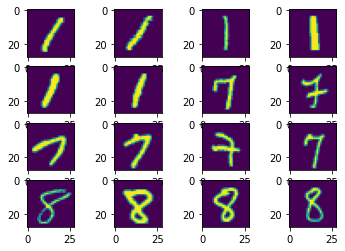

In [16]:
for i in range(16):
    pl.subplot(4, 4, i+1)
    pl.imshow(xx[i*180])

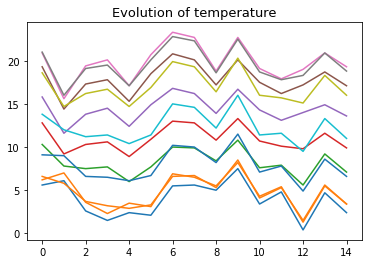

In [17]:
pl.plot(data_1)
pl.title("Evolution of temperature", fontsize = 13)
pl.show()

##### 1.3.3

###### Figure 1

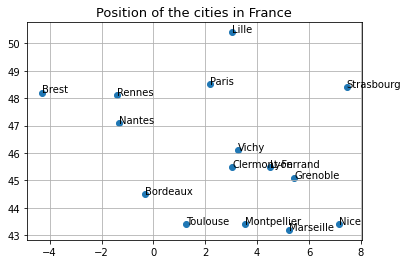

In [18]:
Latitude = []
Longitude = []
for el in data_2:
    Latitude.append(el[1:])
    Longitude.append(el[:1])

for i in range(len(villes)):
    pl.annotate(villes[i], (Latitude[i], Longitude[i]))
               
pl.scatter(Latitude, Longitude)
pl.title('Position of the cities in France', fontsize = 13)

pl.grid()

###### Figure 2

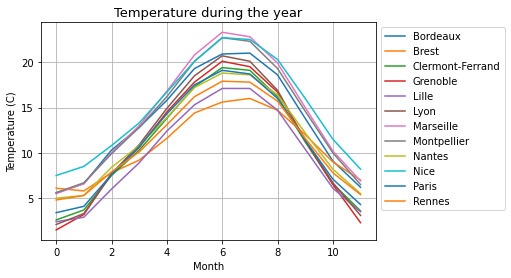

In [19]:
data_1 #Temp of cities

Month = np.linspace(0, 11, 12)
Month
pl.grid()
for i in range(12):
    pl.plot(Month,data_1[i],label=villes[i])
    
pl.title('Temperature during the year', fontsize = 13)
pl.ylabel('Temperature (C)')
pl.xlabel('Month')
pl.legend(bbox_to_anchor = (1.4, 1), loc = 'upper right', prop = {'size': 10})

#### Clustering

# 2.1

#### First dataset

In [281]:
# K-means with K=3
k = 3
clf = KMeans(k)

# fit the model et predict classes
y_1 = clf.fit_predict(data_1)

# distance from samples to clusters
dist_1 = clf.transform(data_1)

# get the centroids
C_1 = clf.cluster_centers_


In [282]:
L = []
for i in range (1,13):
    L.append((y_1[i],villes[i]))
print(L)

sorted(L)

[(2, 'Brest'), (0, 'Clermont-Ferrand'), (0, 'Grenoble'), (0, 'Lille'), (0, 'Lyon'), (1, 'Marseille'), (1, 'Montpellier'), (2, 'Nantes'), (1, 'Nice'), (0, 'Paris'), (2, 'Rennes'), (0, 'Strasbourg')]


[(0, 'Clermont-Ferrand'),
 (0, 'Grenoble'),
 (0, 'Lille'),
 (0, 'Lyon'),
 (0, 'Paris'),
 (0, 'Strasbourg'),
 (1, 'Marseille'),
 (1, 'Montpellier'),
 (1, 'Nice'),
 (2, 'Brest'),
 (2, 'Nantes'),
 (2, 'Rennes')]

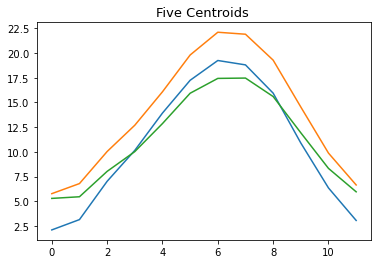

In [283]:
for i in range (k):
    pl.plot(C_1[i])
pl.title("Five Centroids ", fontsize = 13)
pl.show()

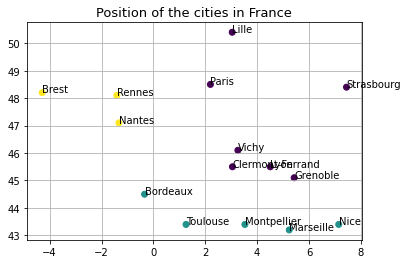

In [284]:
Latitude = []
Longitude = []
for el in data_2:
    Latitude.append(el[1:])
    Longitude.append(el[:1])

for i in range(len(villes)):
    pl.annotate(villes[i], (Latitude[i], Longitude[i]))
               
pl.scatter(Latitude, Longitude, c = y_1)
pl.title('Position of the cities in France', fontsize = 13)

pl.grid()
pl.show()

<div class="alert alert-block alert-warning">
<b>Interpretation:</b>
    
The clustering perfectly make sens. After changing K for different values, with K =3, We find back 3 different type of climates : mediterranean, oceanic and continental.
We have here the "Bretagne" (Breizh) area, in yellow.
The Medditerranean in Blue, and the inside territory, in Purple. This is the best value.

For K = 5 :

[(3, 'Brest'), (0, 'Clermont-Ferrand'), (0, 'Grenoble'), (2, 'Lille'), (0, 'Lyon'), (4, 'Marseille'), (4, 'Montpellier'), (0, 'Nantes'), (4, 'Nice'), (0, 'Paris'), (0, 'Rennes'), (2, 'Strasbourg')]


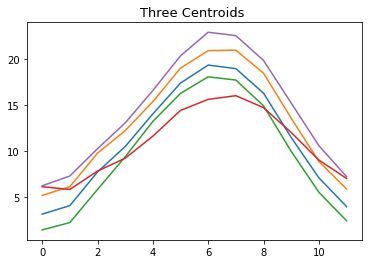

In [286]:
# K-means with K=5
k = 5
clf = KMeans(k)

# fit the model et predict classes
y_1 = clf.fit_predict(data_1)

# distance from samples to clusters
dist_1 = clf.transform(data_1)

# get the centroids
C_1 = clf.cluster_centers_

L = []
for i in range (1,13):
    L.append((y_1[i],villes[i]))
print(L)

sorted(L)
for i in range (k):
    pl.plot(C_1[i])
pl.title("Three Centroids ", fontsize = 13)
pl.show()

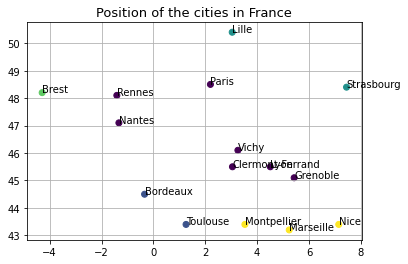

In [287]:
Latitude = []
Longitude = []
for el in data_2:
    Latitude.append(el[1:])
    Longitude.append(el[:1])

for i in range(len(villes)):
    pl.annotate(villes[i], (Latitude[i], Longitude[i]))
               
pl.scatter(Latitude, Longitude, c = y_1)
pl.title('Position of the cities in France', fontsize = 13)
pl.grid()

<div class="alert alert-block alert-warning">
<b>Interpretation:</b>
    
There seems to be a geographical link between the cities, however Paris is as far from Lyon than Rennes, so it is not the best clustering.

#### Second Dataset


In [288]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [289]:
# K-means with K=3
clf = KMeans(3)

# fit the model et predict classes
y_2 = clf.fit_predict(x)

# distance from samples to clusters
dist_2 = clf.transform(x)
distt = clf.inertia_
# get the centroids
C_2 = clf.cluster_centers_


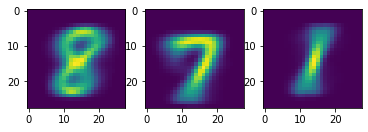

In [290]:
#Do not forgot to reshape to see the digits
cla = []
for i in range(C_2.shape[0]):
    cla.append(C_2[i].reshape((28,28)))
    pl.subplot(1,3, i+1)
    pl.imshow(cla[i])
#faire pour plusieur plot

<div class="alert alert-block alert-warning">
<b>Interpretation:</b>
    
The reason we choose K=3 is because we already know that there are he digits 1,7,8.
If we put K=4 for instance, we will have the cluster 1, then also another 1, then 7, and then 8.
That's why we know that the K=3 is the best parameter.

With K = 4 for instance:

In [291]:
# K-means with K=3
clf2 = KMeans(4)

# fit the model et predict classes
y_22 = clf2.fit_predict(x)

# distance from samples to clusters
dist_22 = clf2.transform(x)
# get the centroids
C_22 = clf2.cluster_centers_

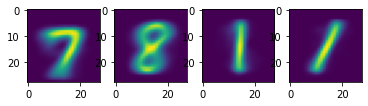

In [292]:
#Do not forgot to reshape to see the digits
cla  = []
for i in range(C_22.shape[0]):
    cla.append(C_22[i].reshape((28,28)))
    pl.subplot(1,4, i+1)
    pl.imshow(cla[i])
#faire pour plusieur plot

## 2.2 Temperature Dataset


### 2.2.1
<div class="alert alert-block alert-warning">
<b>Interpretation:</b>
    
Apparently, all the cities that are quite close like "Bordeaux Toulouse", "Marseille Montpellier Nice" belong to the same cluster. 
It is due to the reality of the temperature: there are the Oceanic cities, the terrestrial cities, ...
To me, it does make sens.

### 2.2.2

Text(0.5, 1.0, 'Evolution of the Temperature in function of the months during the year')

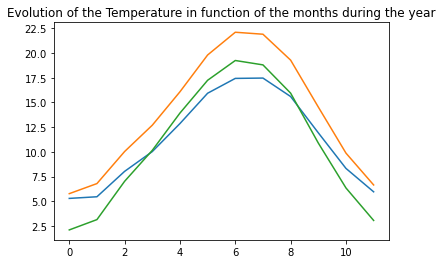

In [293]:
#With the same code in the 2.1 part:
# K-means with K=3
k = 3
clf = KMeans(k)
y_1 = clf.fit_predict(data_1)
dist_1 = clf.transform(data_1)
C_1 = clf.cluster_centers_
L = []
for i in range (k):
    pl.plot(C_1[i])
pl.title('Evolution of the Temperature in function of the months during the year')

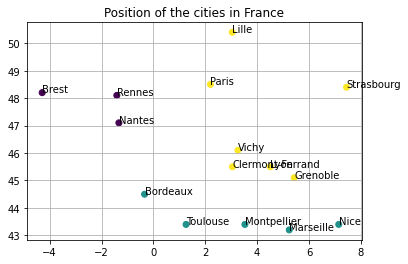

In [294]:
Latitude = []
Longitude = []
for el in data_2:
    Latitude.append(el[1:])
    Longitude.append(el[:1])

for i in range(len(villes)):
    pl.annotate(villes[i], (Latitude[i], Longitude[i]))
               
pl.scatter(Latitude, Longitude,c=y_1)
pl.title('Position of the cities in France')
pl.grid()

<div class="alert alert-block alert-warning">
<b>Interpretation:</b>
    
As in the 2.1 part:

The clustering perfectly make sens. After changing K for different values, with K =3, We find back 3 different type of climates : mediterranean, oceanic and continental.


We have here the "Bretagne" (Breizh) area, in yellow.


The Medditerranean in Blue, and the inside territory, in Purple. This is the best value.

## 2.3

### 2.3.1 

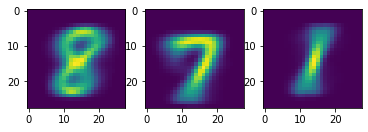

In [295]:
#Do not forgot to reshape to see the digits
cla = []
for i in range(C_2.shape[0]):
    cla.append(C_2[i].reshape((28,28)))
    pl.subplot(1,3, i+1)
    pl.imshow(cla[i])
#faire pour plusieur plot

<div class="alert alert-block alert-warning">
<b>Interpretation:</b>
    
The clusters resemble to an image, but it is definitely not, because it is a mix of different ones, with an average of each in the class.
It's like there are superpositions of images. We can guess the first pic represent the digit 1, then 7 then 8.


### 2.3.2

In [296]:
print(y_2.shape, y_2)

(3000,) [2 2 2 ... 0 0 0]


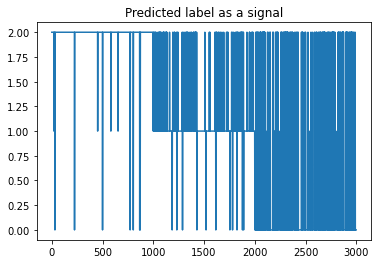

In [297]:
pl.title('Predicted label as a signal')
pl.plot(y_2)

<div class="alert alert-block alert-warning">
<b>Interpretation:</b>

Here we can see that for the first thousand, there is a majority of 2nd class, butthere are some 0 class and 1 class. 
So for the sentence : 

 "Since the samples are ordered by class in the dataset, a clustering
respecting the true class should be piecewise constant. Is that the case?" 

The answer is no ! (There are pisclassifications)

In [298]:
#Rand Score NOT WORKING ON MY LAPTOP
#from sklearn.metrics.cluster import rand_score
#print(rand_score(y.reshape(-1),y_2))

In [299]:
print(adjusted_rand_score(y.reshape(-1),y_2))

0.7431111778078265


### 2.3.4

The adjusted rand score is : 0.00

The adjusted rand score is : 0.42

The adjusted rand score is : 0.74

The adjusted rand score is : 0.68

The adjusted rand score is : 0.57



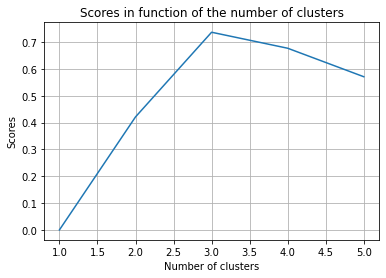

In [301]:
number_of_cluster = []
score = []
for n_clusters_digit in range(1,6):
    number_of_cluster.append(n_clusters_digit)
    kmeans_digit = KMeans(n_clusters = n_clusters_digit, random_state=0).fit(x)
    labels_digit = kmeans_digit.labels_
    
    score_rand_adjusted = adjusted_rand_score(labels_digit, y.flatten())
    score.append(score_rand_adjusted)
    print(f'The adjusted rand score is : {score_rand_adjusted:.2f}')
    
    res_rand_adjusted[n_clusters_digit] = score_rand_adjusted

    print()
   
pl.title('Scores in function of the number of clusters')
pl.plot(number_of_cluster, score, label='Adjusted Rand Index')
pl.xlabel('Number of clusters')
pl.ylabel('Scores')
pl.grid()

<div class="alert alert-block alert-warning">
<b>Interpretation:</b>
    
    
The scores compare the true labels to the predicted labels. 

As there are 3 true labels, it's logical that the best scores is for the exact value of K=3. 

If we have more than 3 true labels, the score is penalized because it doesn't match perfectly.

# 3  Density estimation

### 3.1 and 3.2 

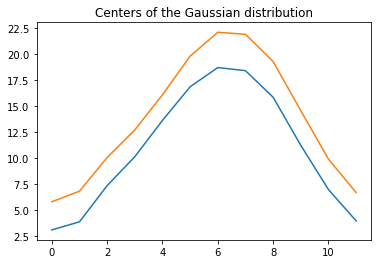

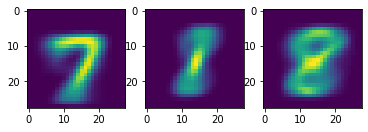

In [302]:
gam_temp = GaussianMixture(n_components = 2, covariance_type='diag').fit(data_1)
centers_temp = gam_temp.means_

gam_digit = GaussianMixture(n_components = 3, covariance_type='diag').fit(x)
centers_digit = gam_digit.means_

pl.title('Centers of the Gaussian distribution')
pl.plot(centers_temp[0])
pl.plot(centers_temp[1])
pl.show()

for i in range(3):
    pl.subplot(1, 3, i+1)
    pl.imshow(centers_digit[i].reshape(28,28))
pl.show()

<div class="alert alert-block alert-warning">
<b>Interpretation:</b>
    
For the temperature dataset
It has created two clusters, one with 'hot temperatures', plotted in blue on the graph, and one with 'cold temperatures', plotted in blue. 

Digit dataset
    
The Gaussian mixture algorithm has formed 3 gaussian, according to the three images that we are seeing. 
There seems to be a 7, a 1, and an 8, as we had we K-means.

As with our K-means observation, the centroids are not real images. 
    


### 3.3

Next
K = 2


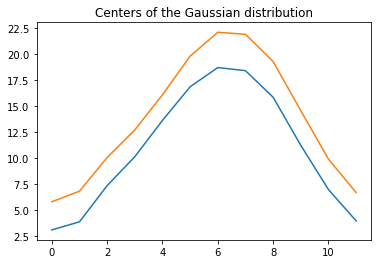

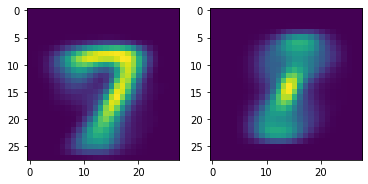

Next
K = 3


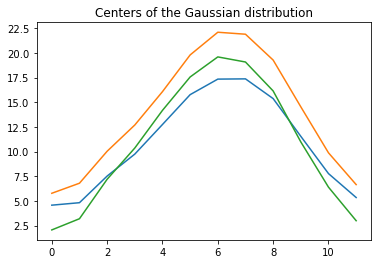

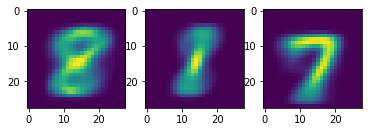

Next
K = 4


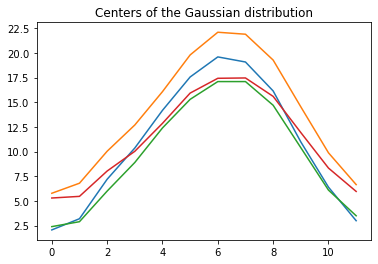

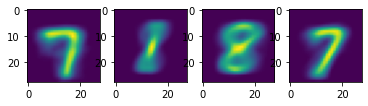

Next
K = 5


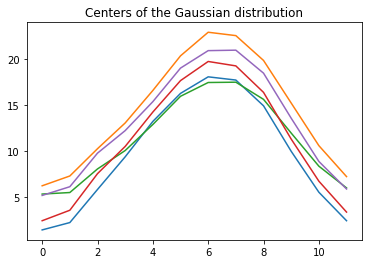

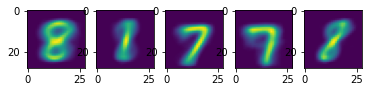

In [303]:
for K in [ 2, 3, 4,5]:
    
    print('Next')
    print(f'K = {K}')

    gam_temp = GaussianMixture(n_components=K, covariance_type='diag').fit(data_1)
    centers_temp = gam_temp.means_

    gam_digit = GaussianMixture(n_components=K, covariance_type='diag').fit(x)
    centers_digit = gam_digit.means_

    pl.title('Centers of the Gaussian distribution')
    for i in range(K):
        pl.plot(centers_temp[i])
    pl.show()

    for i in range(K):
        pl.subplot(1, K, i+1)
        pl.imshow(centers_digit[i].reshape(28,28))
    pl.show()

<div class="alert alert-block alert-warning">
<b>Interpretation:</b>
    
Concerning the values of K, I still think that the best values are K = 3 for both dataset.

For the digit dataset, the first picture and the second picture seems very close picture.
With K=2 we don't have the distinction between the 3 digits we are looking for.

for the temperature dataset:
K=3 seems also to be the best one, with 3 distinguisable curve. For K = 4 and 5 we can't distinguished them clearly.


#### Changing Covariance

Next
 
Covariance_type = spherical


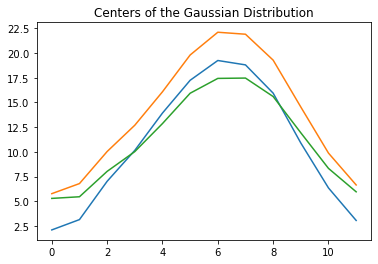

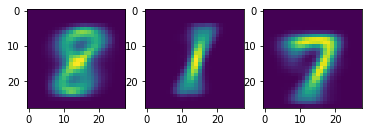

Next
 
Covariance_type = full


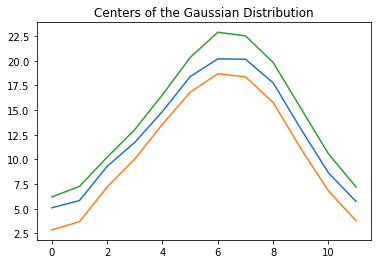

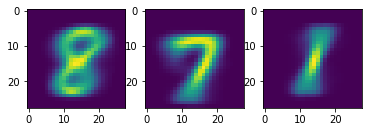

Next
 
Covariance_type = tied


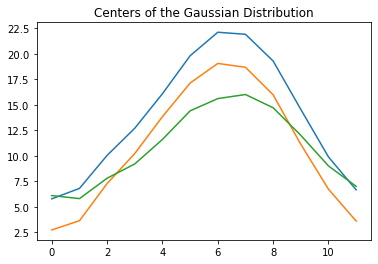

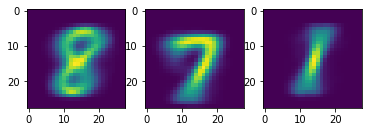

In [304]:
K = 3
for covariance_type in ['spherical', 'full', 'tied']:
    
    print('Next')
    print(' ')
    print(f'Covariance_type = {covariance_type}')

    gam_temp = GaussianMixture(n_components=K, covariance_type=covariance_type).fit(data_1)
    centers_temp = gam_temp.means_

    gam_digit = GaussianMixture(n_components=K, covariance_type=covariance_type).fit(x)
    centers_digit = gam_digit.means_

    pl.title('Centers of the Gaussian Distribution')
    for i in range(K):
        pl.plot(centers_temp[i])
    pl.show()

    for i in range(K):
        pl.subplot(1, K, i+1)
        pl.imshow(centers_digit[i].reshape(28,28))
    pl.show()

<div class="alert alert-block alert-warning">
<b>Interpretation:</b>
    
For the digit dataset:
There doesn't seem to be huge differences, except the fact that for the spherical, the 8 digit seems a bit more blurred.  

For the Temperature Dataset:
The better interpretability is obtained with the tied covariance I think, because we can see a bigger space between the 3 curves.


### 3.1.4

['Lille' 'Strasbourg' 'Nantes']


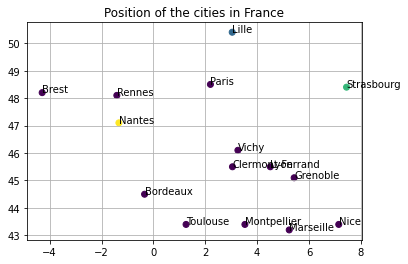

In [305]:
n_outliers = 3
scores_temp = gam_temp.score_samples(data_1)
smallestlog_temp = np.argsort(scores_temp)[:n_outliers]
print(villes[smallestlog_temp])

Latitude = []
Longitude = []
for el in data_2:
    Latitude.append(el[1:])
    Longitude.append(el[:1])

color = np.array([0]*len(villes))
for i in range(n_outliers):
    color[smallestlog_temp[i]] = i+1



for i in range(len(villes)):
    pl.annotate(villes[i], (Latitude[i], Longitude[i]))              
pl.scatter(Latitude, Longitude,c=color)
pl.title('Position of the cities in France')
pl.grid()

<div class="alert alert-block alert-warning">
<b>Interpretation:</b>
We see the three cities that have the lower score in the log probability meaning.
We have NANTES, LILLE and STRASBOURG.
Geographically, they are among the farthest of the center of France. However there is not Nice, or Marseille or Brest for instance. 


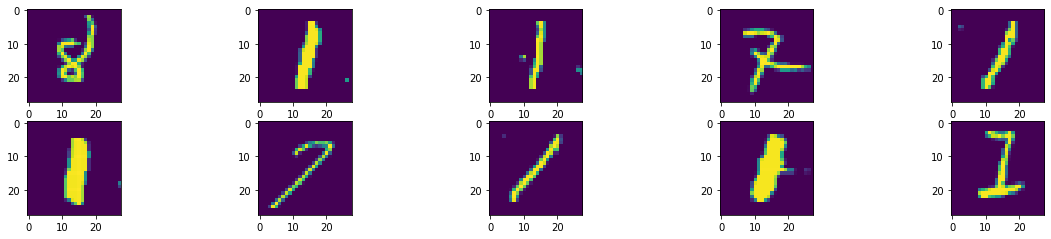

In [306]:
scores_digit = gam_digit.score_samples(x)
smallestlog_digits = np.argsort(scores_digit)[:10]

pl.figure(figsize=(20,10))
for i, ind in enumerate(smallestlog_digits):
    pl.subplot(5, 5, i+1)
    pl.imshow(xx[ind])
pl.show()

<div class="alert alert-block alert-warning">
<b>Interpretation:</b>
    
Here are the 10 smallest log-probability samples for the estimated density, which means that they are the more away of the centers of the centroids.

There seems to be default of drawing. Look at the 8 in the first picture or the seven at the 4th position. There are like defaut added due to the writer, the quality of the draw, ...

Some people may write a 1 and a 7 with almost the same gesture so it is a bit complicated to decide wether its a 7 or a 1.


### 3.1.5

In [307]:
#Only for the digit dataset with a rand_score that is not working

gam_labels_digit = gam_digit.predict(x)
score_rand_adjusted = adjusted_rand_score(gam_labels_digit, y.flatten())
print(score_rand_adjusted)

0.7644503176004408


<div class="alert alert-block alert-warning">
<b>Interpretation:</b>
    
It is a little better than the Kmeans adj_rand_score with k=3 (it was around 0.74)
I don't have clear explanation in mind. 

### 3.1.6

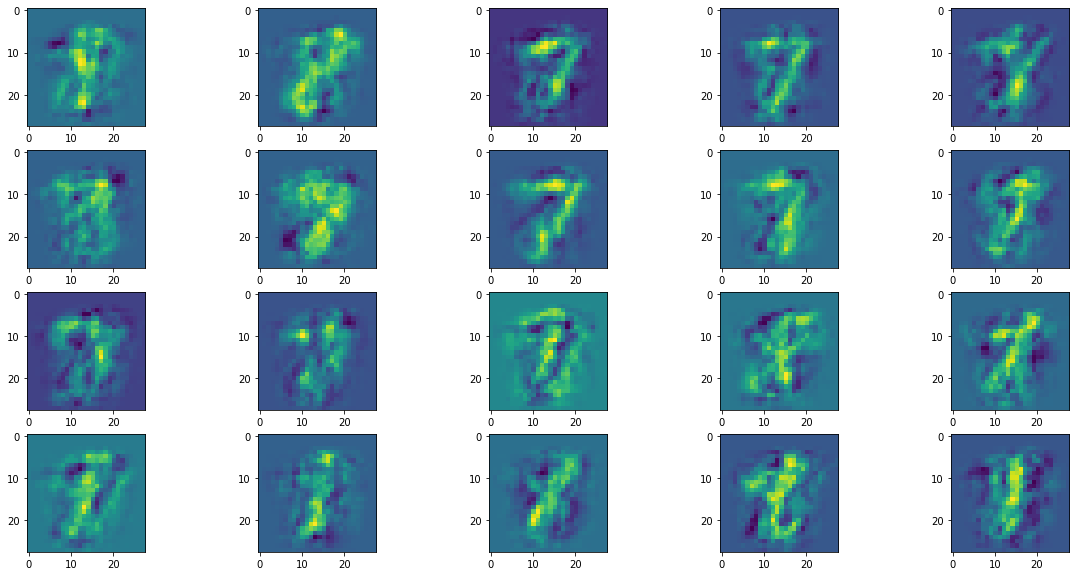

In [308]:
n_samples = 20
generated_samples = gam_digit.sample(n_samples)

pl.figure(figsize=(20,10))

for i in range(n_samples):
    pl.subplot(4, 5, i+1)
    pl.imshow(generated_samples[0][i].reshape(28,28))
    #plt.title(f'Label {generated_samples[0][i]}')
pl.show()

<div class="alert alert-block alert-warning">
<b>Interpretation:</b>
    
The generated samples seems different from the real ones, as if there was lots of noise in them. Even if the color are not exactly the same, the form and the contrast is clearly not the same.
So the answer is yes, we can differienciate them from real data.

# 4 Dimensionality reduction

4.1

**First Dataset : Temperature**

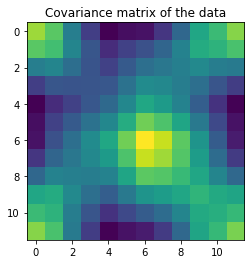

In [309]:
pl.title('Covariance matrix of the data')
pl.imshow(np.cov(data[:,:12].T))
pl.show()

<div class="alert alert-block alert-warning">
<b>Interpretation:</b>
    

The covariance is high in the center of the image, and in the corners. This comes from the fact that on the corners, we calculate the covariance between months 0 and 11 that are very close. 
In the center, it is because we are in summer, and when it is hot in July, it is generally hot in June and August for the same region, area.
For december and January, it is also around the same temperatures in the same area.

However, for the other months between them, the covariance is low, because it's not because in August, the temperature was high, that in december, there will also be a hot temperature in the same area, that's why the covariance is low there (center up, center bottom, left middle and right middle).

**Second Dataset : digits**

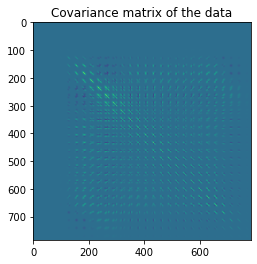

In [310]:
pl.title('Covariance matrix of the data')
pl.imshow(np.cov(x.T))
pl.show()

<div class="alert alert-block alert-warning">
<b>Interpretation:</b>
    

The covariances seems to be relatively low here.

It is at the maximum in the center. It means that when the 100th pixel is close to 255 (color from 0 to 255 in value) for an image, the 100th pixels of other images is more probably close for 255 for other images, and vice-versa.

The pixel where something is drawn are quiet on the same places on the different images. The edges of the images are black, and the center of the images are lighter, whether it be for a 1, a 7 or an 8. Almost every images have their center in the same place.

Add to that, we observe some structure in this matrix: 
This comes from the "reshape" operation that we make. (28X28)

### 4.2
**First Dataset : Temperature**

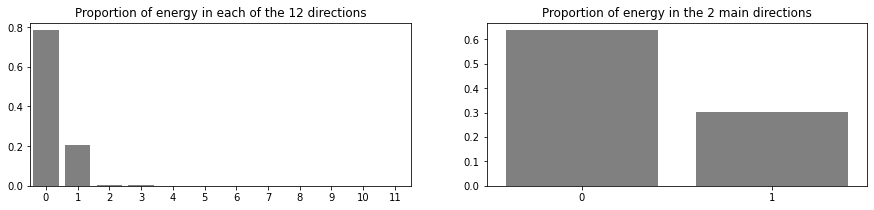

In [311]:
pl.figure(figsize=(15,3))
pca = PCA(n_components=None)
pca.fit(data_1)
pl.subplot(121)
sns.barplot(x=np.arange(12), y=pca.explained_variance_ratio_, color='grey')
pl.title('Proportion of energy in each of the 12 directions')


pca = PCA(n_components=2)
pca.fit(data)
pl.subplot(122)
sns.barplot(x=np.arange(2), y=pca.explained_variance_ratio_, color='grey')
pl.title('Proportion of energy in the 2 main directions')
pl.show()


<div class="alert alert-block alert-warning">
<b>Interpretation:</b>
    
We can see a slight energy on direction 2 and 3, but the majority is in the 0 and 1 directions.
The goal of PCA is to reduce dimensions, we can thus conclude we will not loose lots of energy by doing this, because it is mainly in the 2 first directions

**Second Dataset : digits**

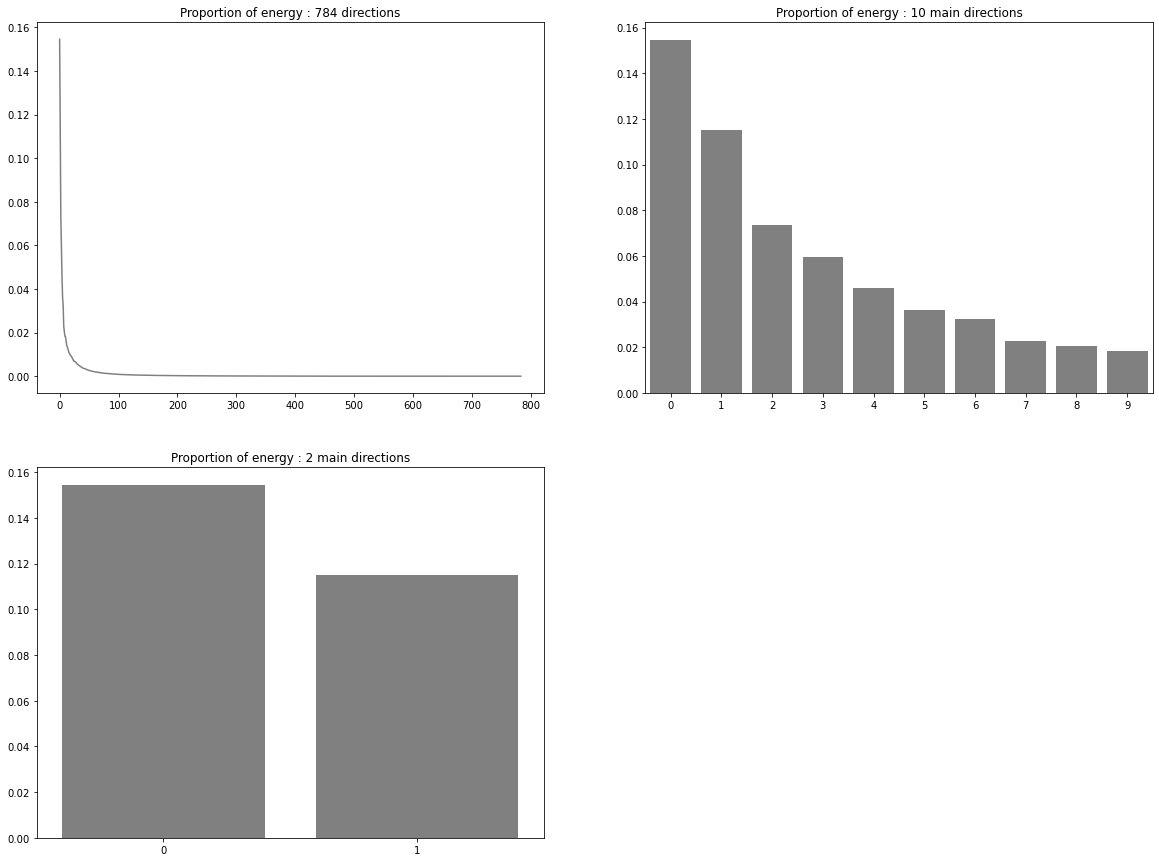

In [312]:
pl.figure(figsize=(20,15))
pca = PCA(n_components=None)
pca.fit(x)
pl.subplot(221)
pl.plot(pca.explained_variance_ratio_, color='grey')
pl.title('Proportion of energy : 784 directions')

pca = PCA(n_components=None)
pca.fit(x)
pl.subplot(222)
sns.barplot(x=np.arange(10), y=pca.explained_variance_ratio_[:10], color='grey')
pl.title('Proportion of energy : 10 main directions')


pca = PCA(n_components=2)
pca.fit(x)
pl.subplot(223)
sns.barplot(x=np.arange(2), y=pca.explained_variance_ratio_, color='grey')
pl.title('Proportion of energy : 2 main directions')
pl.show()

<div class="alert alert-block alert-warning">
<b>Interpretation:</b>
    
For the digit dataset:
We have only a little more than a quarter of the information in our two first directions (0.15+0.12) . 
That's really not as in the other dataset. 
And that's logical, because the initial dimension is 784. We go from d=784 to d=2 so it's normal to loose lots of information. 

**First Dataset : Temperature**

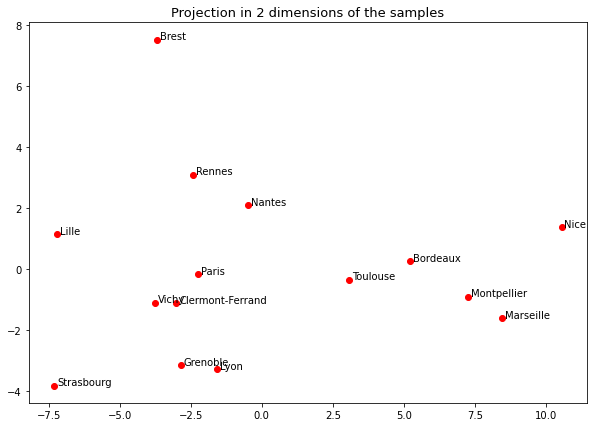

In [325]:
pca = PCA(n_components=2)
pca.fit(data_1)
data_projected = pca.transform(data_1)
pl.figure(figsize=(10,7))

for i in range(len(data_projected)):
    pl.scatter(data_projected[i][0], data_projected[i][1], color='red')
    pl.text(x=data_projected[i][0]+0.1, y=data_projected[i][1], s=villes[i])
pl.title('Projection in 2 dimensions of the samples', fontsize=13)
pl.show()

<div class="alert alert-block alert-warning">
<b>Interpretation:</b>
    
After projecting our samples in 2D, after PCA, we almost have the geographical position on the french map.
We have all the north cities on the left, the south citites on the right. Strasbourg is opposed to Brest and Lille at the opposite of Nice. This plot is very intersting :  we have lose very few information (as seen in the previous question), and we even have a very interesting interpretation by going from dimension 12 to dimension 2.
Thus we are capable of making the quite same cluster as before with the south, north and Breizh area.

**Second Dataset : digits**

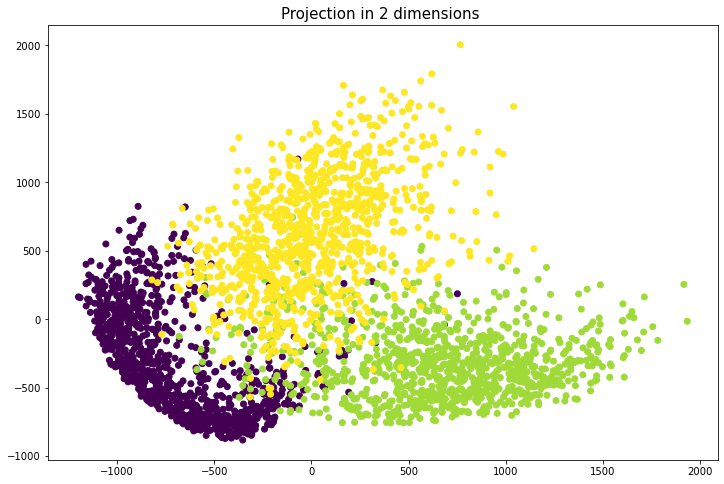

In [314]:
pca = PCA(n_components=2)
pca.fit(x)
x_projected = pca.transform(x)

pl.figure(figsize=(12,8))
pl.scatter(x_projected[:,0], x_projected[:,1], c=y)   
pl.title('Projection in 2 dimensions ', fontsize=15)
pl.show()

<div class="alert alert-block alert-warning">
<b>Interpretation:</b>
    
Even by loosing information, the graph shows a coherence between the data.
In 2D, the 1 are close to 1, 8 to 8 and 7 to 7. We therefore see some outliers.
The true class seems not so far away

**First Dataset : Temperature**

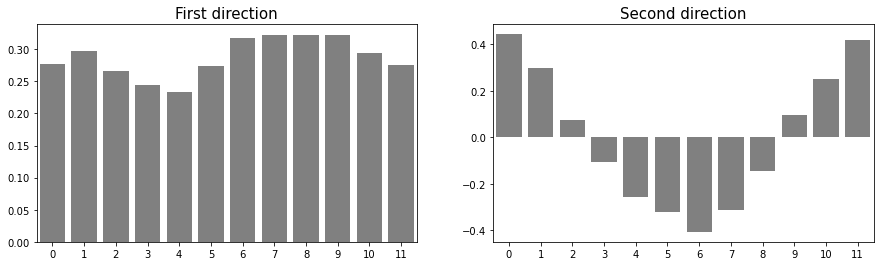

In [315]:
pca = PCA(n_components=2)
pca.fit(data_1)

pl.figure(figsize=(15,4))
pl.subplot(121)
pl.title('First direction', fontsize = 15)
sns.barplot(x=np.arange(12), y=pca.components_[0], color='grey')
pl.subplot(122)
pl.title('Second direction', fontsize = 15)
sns.barplot(x=np.arange(12), y=pca.components_[1], color='grey')
pl.show()

<div class="alert alert-block alert-warning">
<b>Interpretation:</b>
    
This two direction could be interpreted like this :

First direction : average temperature. It is a weighted average of the temperature over all months.
Second direction : difference between winter and summer. We take the temperature of winter positively, and those of summer negatively.
With only this two information we can retrieve a city and it temperature over each month.

**Second Dataset : digits**

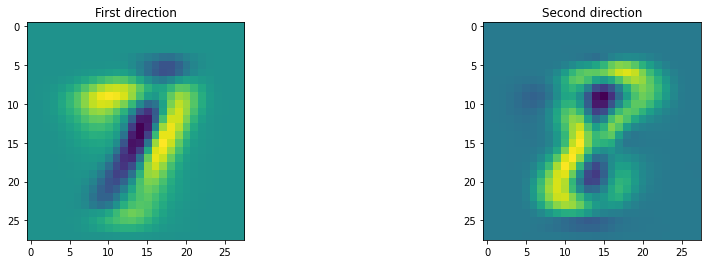

In [316]:
pca = PCA(n_components=2)
pca.fit(x)

pl.figure(figsize=(15,4))
pl.subplot(121)
pl.title('First direction')
pl.imshow(pca.components_[0].reshape(28, 28))
pl.subplot(122)
pl.title('Second direction')
pl.imshow(pca.components_[1].reshape(28, 28))
pl.show()

<div class="alert alert-block alert-warning">
<b>Interpretation:</b>
    
Those two directions could be interpreted like this :

First direction : a Seven in Yellow, and a One in Dark Blue.
Second direction : an Eight in Yellow, and an (1,7) mix in dark Blue.

We therefore are able to detect with those 2 directions the 3 digits.

**First Dataset : Temperature**

In [317]:
## To COMPLETE

**Second Dataset : digits**

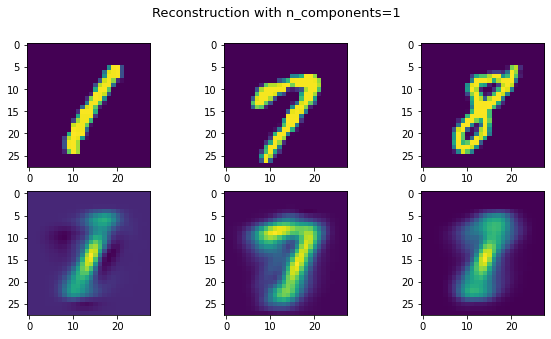

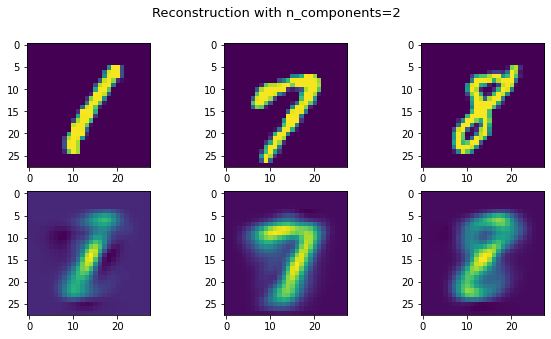

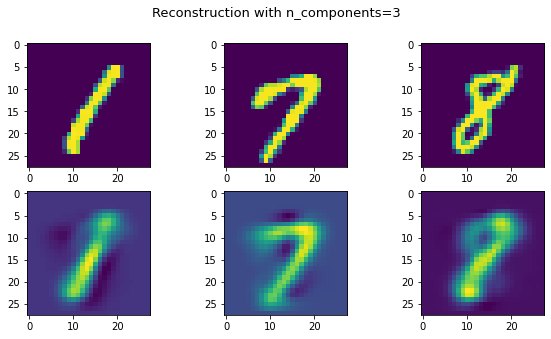

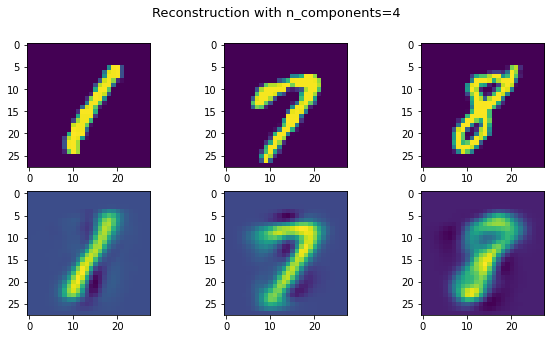

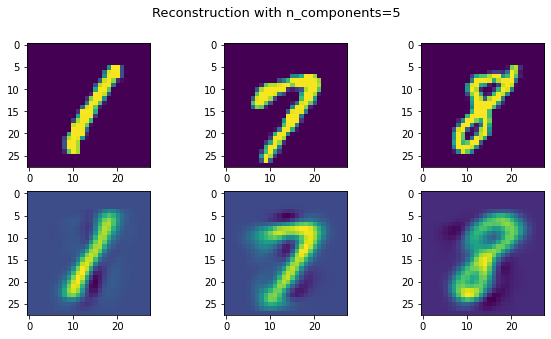

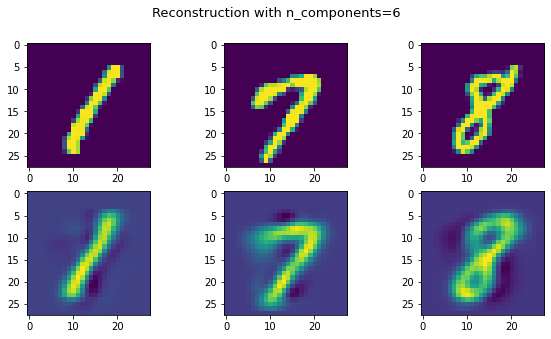

In [318]:
for n_components in [1, 2, 3, 4, 5, 6]:
    pca = PCA(n_components=n_components)
    pca.fit(x)
    
    x_projected = pca.transform(x)
    x_reconstructed = pca.inverse_transform(x_projected)

    pl.figure(figsize=(10,5))
    for i, ind in enumerate([0, 1000, 2000]):
        pl.subplot(int(f'23{i+1}'))
        pl.imshow(x[ind].reshape(28,28))
        pl.subplot(int(f'23{i+4}'))
        pl.imshow(x_reconstructed[ind].reshape(28,28))
    pl.suptitle(f'Reconstruction with n_components={n_components}', fontsize=13)
    pl.show()

<div class="alert alert-block alert-warning">
<b>Interpretation:</b>
    
We are reconstructing a 1, a 7 and a 8. 
When p grows up, the reconstruction is more easy. 

It is visible on the images, especially for the 1 and the 7. 
In fact, we have less blurr for p=5 than for p=1, for the 1 and the 7 digit.

The 8 begin to be distinguishable from p=5 and is much better for p=6.

To have a perfect reconstruction, we need to increase the  number of directions.

### 4.2 Manifold Learning : TSNE

#### 4.2.1

In [319]:
data_embedded = TSNE(n_components=2).fit_transform(data_1)

In [320]:
x_embedded = TSNE(n_components=2).fit_transform(x)

#### 4.2.2

**First Dataset : Temperature**

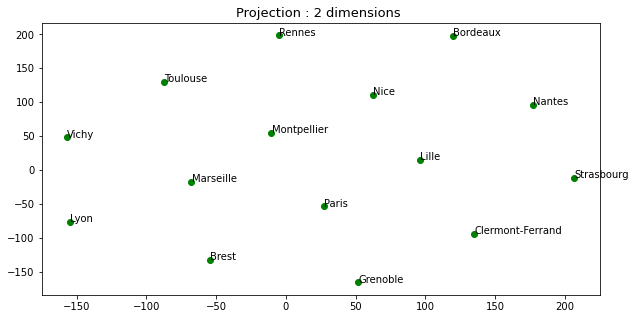

In [321]:
pl.figure(figsize=(10,5))
for i in range(len(data_projected)):
    pl.scatter(data_embedded[i][0], data_embedded[i][1], color='green')
    pl.text(x=data_embedded[i][0]+0.1, y=data_embedded[i][1], s=villes[i])
pl.title('Projection : 2 dimensions ', fontsize=13)
pl.show()

<div class="alert alert-block alert-warning">
<b>Interpretation:</b>
    
We can not recognize anything here, there seems to be a uniform distribution in the plan.
For this, the TSNE is useless in for this dataset, the default value seems to be not efficient, probably too high.


**Second Dataset : digits**

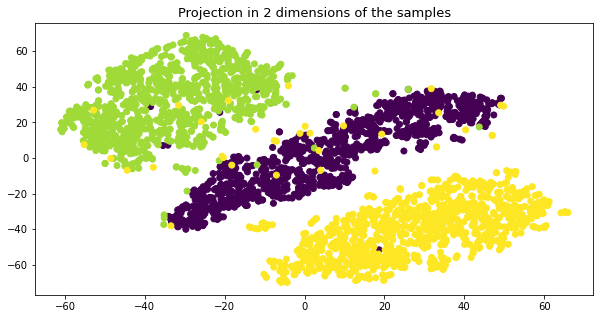

In [322]:
pl.figure(figsize=(10, 5))
pl.scatter(x_embedded[:,0], x_embedded[:,1], c=y)   
pl.title('Projection in 2 dimensions of the samples', fontsize=13)
pl.show()

<div class="alert alert-block alert-warning">
<b>Interpretation:</b>
    
In this very Digit Dataset, we can clearly see the 3 clusters. The default velue of the perplexity seems to be very good. Even with some outliers, we have good results.

### 4.2.3

**First Dataset : Temperature**

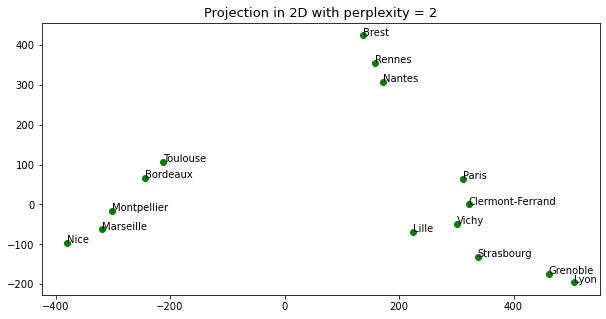

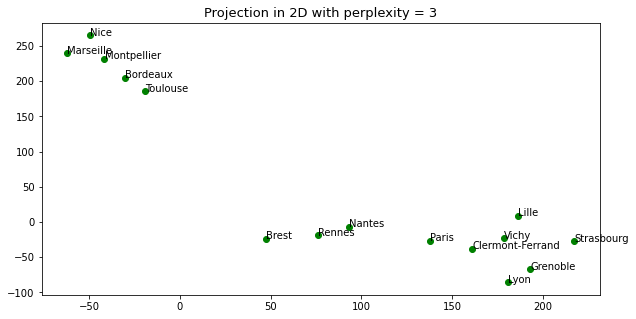

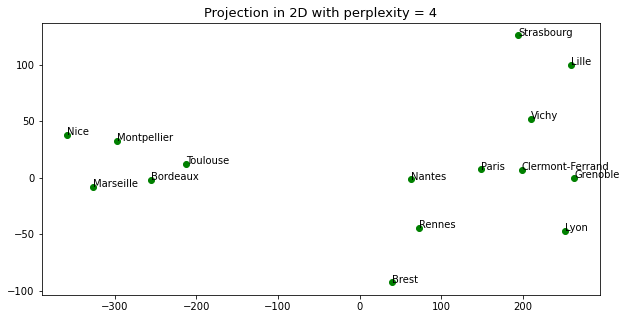

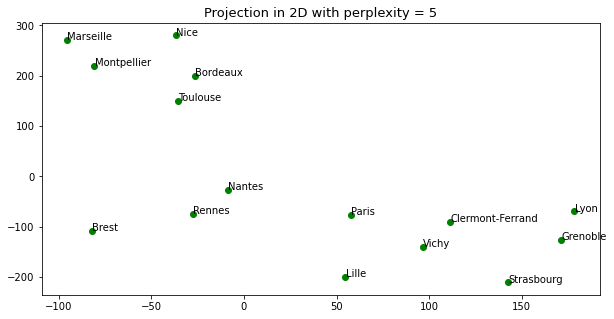

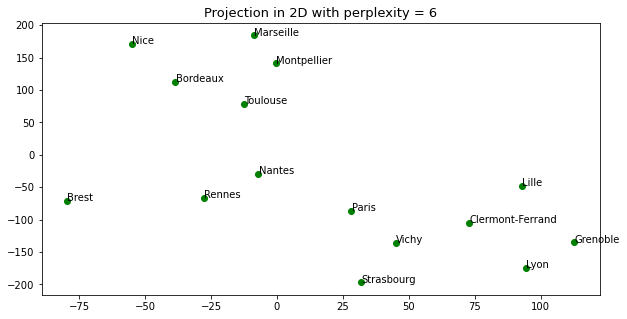

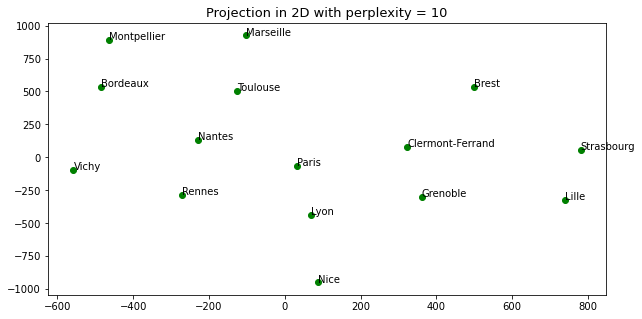

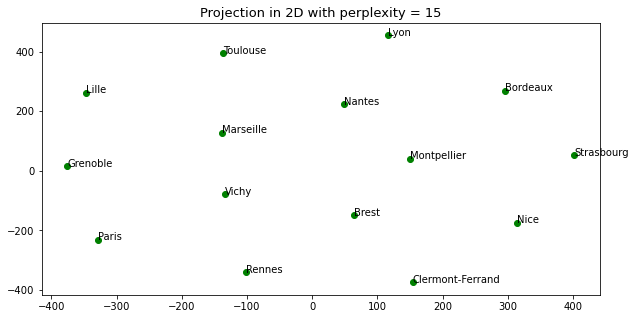

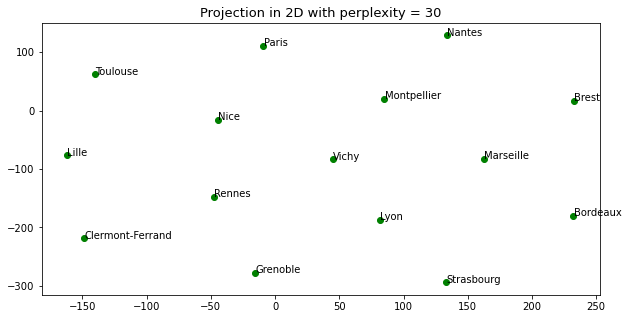

In [323]:
for perplexity in [2, 3, 4, 5,6, 10, 15, 30]:
    data_embedded = TSNE(n_components=2, perplexity=perplexity).fit_transform(data_1)
    pl.figure(figsize=(10,5))
    for i in range(len(data_projected)):
        pl.scatter(data_embedded[i][0], data_embedded[i][1], color='green')
        pl.text(x=data_embedded[i][0]+0.1, y=data_embedded[i][1], s=villes[i])
    pl.title(f'Projection in 2D with perplexity = {perplexity}', fontsize=13)
    pl.show()

<div class="alert alert-block alert-warning">
<b>Interpretation:</b>
    

With:

p = 2 : there is the distinction between south, west and the rest

p = 3 : there is the distinction between south, west and the rest

p = 4 : there is a distinction between south, Starsbourg and Lille, and the rest

p = 5 : there is a distinction between south, north, and the inside territory except for strasbourg and Lille.

p = 6 : there is a distinction between south, north, Paris, Clermont/Vichy and strasbourg, and Lyon Grenoble Lille.

After p = 10+, we find the uniform distribution as for the default perplexity which was too high.

**Second Dataset : digits**

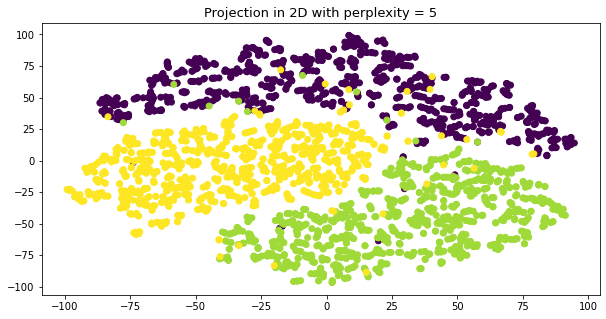

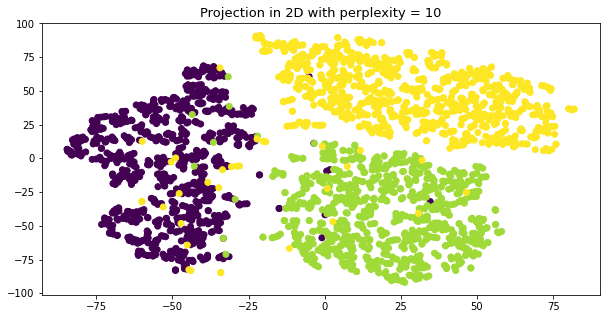

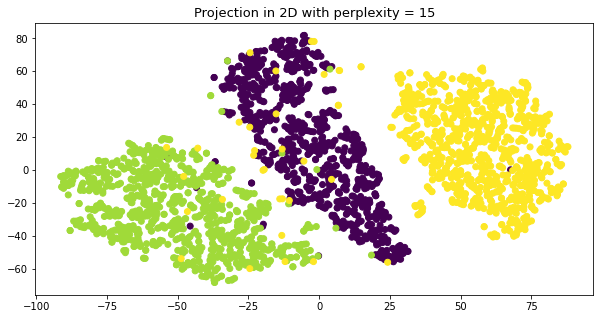

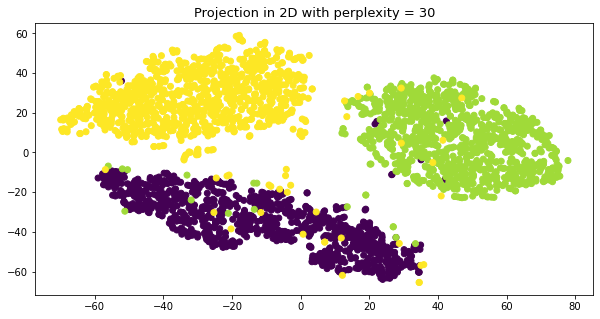

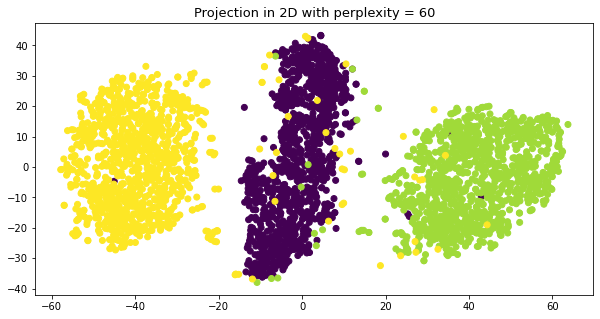

In [324]:
for perplexity in [5, 10, 15, 30, 60]:
    x_embedded = TSNE(n_components=2, perplexity=perplexity).fit_transform(x)
    pl.figure(figsize=(10,5))
    pl.scatter(x_embedded[:,0], x_embedded[:,1], c=y)   
    pl.title(f'Projection in 2D with perplexity = {perplexity}', fontsize=13)
    pl.show()

<div class="alert alert-block alert-warning">
<b>Interpretation:</b>
    
For the perplexity = 30, we can see that :
2 classes seems to have spherical distributions
one class seems to have a more elliptic distributions

For p = 5, the form of the distributions is more weird. It confirms the fact that by giving a too small perplexity to TSNE, we begin to have forms that should not exist : they don't represent the reality of the distributions.
On the other side, for p = 60, we have something very spread out.

***The end of the report must contain a personal discussion about the session (what was hard to understand
and implement, how you would do it next time, what was new, discussion of relation with the course, personal
discussion about how to use these tools in a professional setting, . . . ).***

<div class="alert alert-block alert-success">
<b>Conclusion:</b>
    
What was hard to understand: 

Sometimes in this TP, I founded hard to clearly interpret the results, because we didn't know exactly what we should get in the end of each method. The notion of perplexity was pretty hard to get.
I also believe that by working not really on theory but on real case, it was sometimes hard to get my head out of the code and to find clear explanation about what is going on.

Next time, I would perhaps create function to plot more efficiently, instead of writing everything, everytime ;)

Last year, even if i did some ML, i didn't implement all those algorithm in specific case, for unsupervised learning. That's why I really appreciate to put it into some data like temperature, numbers but also on pictures for the digits.

It is very intersting to know how it works, and how we can improve things.

I also wanted to say that the PCA directions were really interesting to focus on, because I can not imagine before to plot directions about images.

I think it is nice to have the course just before, so we have all concept in mind just before doing such a tp which is precise about too different databases.
